In [1]:
# data analysis libraries:
import numpy as np
import pandas as pd

# data visualization libraries:
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warnings:
import warnings
warnings.filterwarnings('ignore')

# to display all columns:
pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
# to import train and test of titanic dataset from kaggle
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
#  to copy titanic datasets ( as train and test) into another variable.
dtr = train_data.copy()
dts = test_data.copy()

In [4]:
dtr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
dts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


test ve train datasetini islemleri kisaltmak adina birlestirlim. en sonunda tekrar ayiracagiz

In [6]:
# To combine the dtr and dts data into one variable. 
# (We do this so as not to repeat the same operations on both notebooks (dtr and dts) on both datasets.)
df = pd.concat([dtr,dts], ignore_index=True)

In [7]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [8]:
df.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
1308,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


In [9]:
# some of the operations on dataset that has numerical varibales. it is meaningless for categorical variables.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000


To find out how many different types of observation units are in categorical variables (**.value_counts()** function is for that.)

In [10]:
df["Pclass"].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [11]:
df["Sex"].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [12]:
df["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [13]:
df["SibSp"].value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [14]:
df["Parch"].value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64

In [15]:
df["Ticket"].value_counts()

CA. 2343            11
1601                 8
CA 2144              8
PC 17608             7
3101295              7
                    ..
349233               1
SOTON/O2 3101287     1
347075               1
250643               1
PC 17473             1
Name: Ticket, Length: 929, dtype: int64

Data Visulation

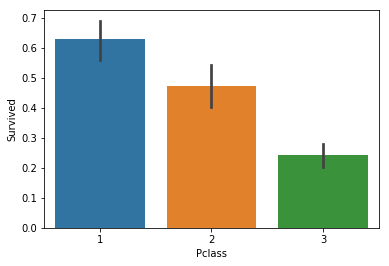

In [16]:
sns.barplot(x= "Pclass", y = "Survived", data = df);

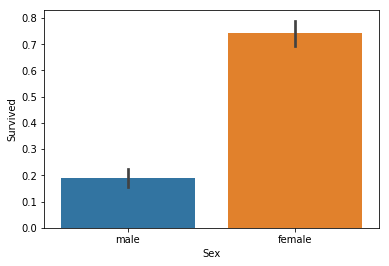

In [17]:
sns.barplot(x= "Sex", y = "Survived", data = df);

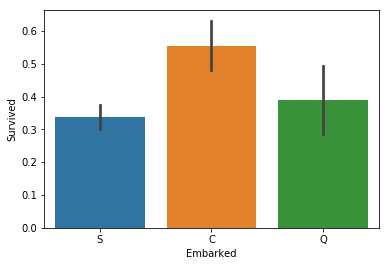

In [18]:
sns.barplot(x= "Embarked", y= "Survived", data =df);

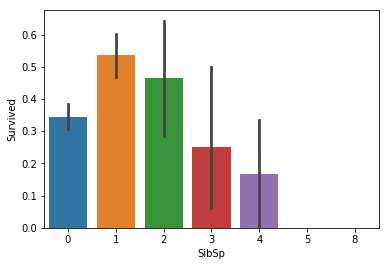

In [19]:
sns.barplot(x= "SibSp", y = "Survived", data= df);

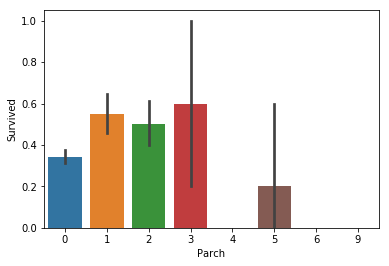

In [20]:
sns.barplot(x= "Parch", y = "Survived", data= df);

Data preparation

In [21]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [22]:
# To assign categorically 1 to passengers with any cabin number and 0 to those without a cabin number.
df["Cabin"] = df["Cabin"].notnull().astype("int")

In [23]:
df["Cabin"].value_counts()

0    1014
1     295
Name: Cabin, dtype: int64

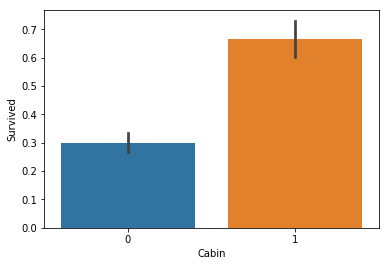

In [24]:
sns.barplot(x= "Cabin", y = "Survived", data= df);

In [25]:
df["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [26]:
df["Embarked"] = df["Embarked"].fillna("S")

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          1309 non-null int64
Embarked       1309 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(5), object(4)
memory usage: 122.8+ KB


In [28]:
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [29]:
df.isnull().sum()

Age              0
Cabin            0
Embarked         0
Fare             1
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
dtype: int64

In [30]:
df[df["Fare"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,0,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [31]:

df[["Pclass", "Fare"]].groupby("Pclass").mean()

,Fare
Pclass,
1,87.508992
2,21.179196
3,13.302889


In [32]:
df["Fare"][1043] = 13

In [33]:
df.isnull().sum()

Age              0
Cabin            0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
dtype: int64

In [34]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,1,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,1,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1309.0,29.881138,12.883193,0.17,22.0000,29.881138,35.000,80.0000
Cabin,1309.0,0.225363,0.417981,0.00,0.0000,0.000000,0.000,1.0000
Fare,1309.0,33.279975,51.741920,0.00,7.8958,14.454200,31.275,512.3292
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.000000,0.000,9.0000
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.000000,982.000,1309.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.000000,3.000,3.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.000000,1.000,8.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.000,1.0000


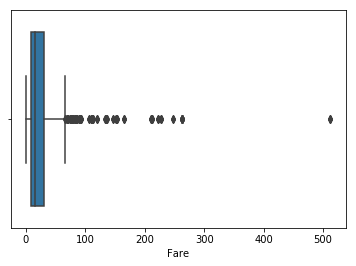

In [36]:
sns.boxplot(x=df["Fare"])

In [37]:
Q1 = df["Fare"].quantile(0.25)
Q1

7.8958

In [38]:
Q3 =  df["Fare"].quantile(0.75)
Q3

31.275

In [39]:
IQR = Q3-Q1

In [40]:
low_limit = Q1 - 1.5*IQR
high_limit = Q3 + 1.5*IQR
high_limit

66.34379999999999

In [41]:
df[df["Fare"] > high_limit]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1,38.000000,1,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
27,19.000000,1,S,263.0000,"Fortune, Mr. Charles Alexander",2,28,1,male,3,0.0,19950
31,29.881138,1,C,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,32,1,female,1,1.0,PC 17569
34,28.000000,0,C,82.1708,"Meyer, Mr. Edgar Joseph",0,35,1,male,1,0.0,PC 17604
52,49.000000,1,C,76.7292,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",0,53,1,female,1,1.0,PC 17572
...,...,...,...,...,...,...,...,...,...,...,...,...
1288,48.000000,1,C,79.2000,"Frolicher-Stehli, Mrs. Maxmillian (Margaretha ...",1,1289,1,female,1,NaN,13567
1291,30.000000,1,S,164.8667,"Bonnell, Miss. Caroline",0,1292,1,female,0,NaN,36928
1298,50.000000,1,C,211.5000,"Widener, Mr. George Dunton",1,1299,1,male,1,NaN,113503
1302,37.000000,1,Q,90.0000,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,1303,1,female,1,NaN,19928


In [42]:
df["Fare"].sort_values(ascending=False).head()

737     512.3292
1234    512.3292
679     512.3292
258     512.3292
438     263.0000
Name: Fare, dtype: float64

In [43]:
df["Fare"] = df["Fare"].replace(512.3292, 263)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1309 non-null float64
Cabin          1309 non-null int64
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(5), object(4)
memory usage: 122.8+ KB


In [45]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,1,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,1,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [46]:
embarked_mapping = {"S":1, "C":2, "Q": 3} 
df["Embarked"] = df["Embarked"].map(embarked_mapping)

In [47]:
#2. yontem

# for i in range(0, len(df["Embarked"])):
#     if df["Embarked"][i] == "S":
#         df["Embarked"][i] = 1
#     elif df["Embarked"][i] == "C":
#         df["Embarked"][i] = 2
#     elif df["Embarked"][i] == "Q":
#         df["Embarked"][i] = 3

In [48]:
df.head(20)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.000000,0,1,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.000000,1,2,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.000000,0,1,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.000000,1,1,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.000000,0,1,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,29.881138,0,3,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.000000,1,1,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.000000,0,1,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.000000,0,1,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.000000,0,2,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [49]:
df.drop(["Ticket"],axis =1, inplace = True)

In [50]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived
0,22.0,0,1,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0
1,38.0,1,2,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0
2,26.0,0,1,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0
3,35.0,1,1,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0
4,35.0,0,1,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0


In [51]:
for i in range(0, len(df["Sex"])):
    if df["Sex"][i] == "male":
        df["Sex"][i] = 1
    elif df["Sex"][i] == "female":
        df["Sex"][i] = 0
   


In [54]:
df["Title"] = df["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)

In [55]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title
0,22.0,0,1,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,Mr
1,38.0,1,2,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,Mrs
2,26.0,0,1,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,Miss
3,35.0,1,1,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,Mrs
4,35.0,0,1,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,Mr


In [56]:
df["Title"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Ms            2
Mlle          2
Major         2
Dona          1
Lady          1
Countess      1
Jonkheer      1
Mme           1
Sir           1
Don           1
Capt          1
Name: Title, dtype: int64

In [57]:
df.Title = df['Title'].replace(['Lady', 'Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
df.Title = df['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
df.Title = df['Title'].replace('Mlle', 'Miss')
df.Title = df['Title'].replace('Ms', 'Miss')
df.Title = df['Title'].replace('Mme', 'Mrs')

In [58]:
df.Title.value_counts()

Mr        757
Miss      264
Mrs       198
Master     61
Rare       27
Royal       2
Name: Title, dtype: int64

In [59]:
df[["Title", "Survived"]].groupby(["Title"], as_index = False ).mean()


,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [60]:
Title_mapping = {"Mr":1, "Miss":2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 5} 
df["Title"] = df["Title"].map(Title_mapping)

In [61]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title
0,22.0,0,1,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,1
1,38.0,1,2,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,3
2,26.0,0,1,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,2
3,35.0,1,1,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,3
4,35.0,0,1,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,1


In [62]:
df.drop("Name", axis =1, inplace= True)

In [63]:
df.head()

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title
0,22.0,0,1,7.2500,0,1,3,1,1,0.0,1
1,38.0,1,2,71.2833,0,2,1,0,1,1.0,3
2,26.0,0,1,7.9250,0,3,3,0,0,1.0,2
3,35.0,1,1,53.1000,0,4,1,0,1,1.0,3
4,35.0,0,1,8.0500,0,5,3,1,0,0.0,1


In [66]:
# yas gruplari icin diger yontem
bins = [0, 5, 12, 18, 24, 35, 60, np.inf]
mylabels = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df["Age"], bins, labels = mylabels)

age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
df['AgeGroup'] = df['AgeGroup'].map(age_mapping)

In [67]:
df.drop("Age", axis = 1, inplace = True)

In [68]:
df.head()

,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title,AgeGroup
0,0,1,7.2500,0,1,3,1,1,0.0,1,4
1,1,2,71.2833,0,2,1,0,1,1.0,3,6
2,0,1,7.9250,0,3,3,0,0,1.0,2,5
3,1,1,53.1000,0,4,1,0,1,1.0,3,5
4,0,1,8.0500,0,5,3,1,0,0.0,1,5


In [69]:
df["FareBand"]= pd.qcut(df["Fare"], 5 , [1,2,3,4,5])

In [70]:
df.FareBand.value_counts()

1    275
4    265
5    259
3    256
2    254
Name: FareBand, dtype: int64

In [71]:
df.drop("Fare", axis= 1, inplace = True)

In [72]:
df.head()

,Cabin,Embarked,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title,AgeGroup,FareBand
0,0,1,0,1,3,1,1,0.0,1,4,1
1,1,2,0,2,1,0,1,1.0,3,6,5
2,0,1,0,3,3,0,0,1.0,2,5,2
3,1,1,0,4,1,0,1,1.0,3,5,5
4,0,1,0,5,3,1,0,0.0,1,5,2


In [73]:
df["FamilySize"] = df["SibSp"] + df["Parch"]+1

In [74]:
df.head()

,Cabin,Embarked,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title,AgeGroup,FareBand,FamilySize
0,0,1,0,1,3,1,1,0.0,1,4,1,2
1,1,2,0,2,1,0,1,1.0,3,6,5,2
2,0,1,0,3,3,0,0,1.0,2,5,2,1
3,1,1,0,4,1,0,1,1.0,3,5,5,2
4,0,1,0,5,3,1,0,0.0,1,5,2,1


In [75]:
df["Single"] = df["FamilySize"].map(lambda x: 1 if x ==   1 else 0)
df["SmaFam"] = df["FamilySize"].map(lambda x: 1 if x ==   2 else 0)
df["MedFam"] = df["FamilySize"].map(lambda x: 1 if 3<=x<= 4 else 0)
df["LarFam"] = df["FamilySize"].map(lambda x: 1 if x >    4 else 0)

In [76]:
df.head(5)

,Cabin,Embarked,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title,AgeGroup,FareBand,FamilySize,Single,SmaFam,MedFam,LarFam
0,0,1,0,1,3,1,1,0.0,1,4,1,2,0,1,0,0
1,1,2,0,2,1,0,1,1.0,3,6,5,2,0,1,0,0
2,0,1,0,3,3,0,0,1.0,2,5,2,1,1,0,0,0
3,1,1,0,4,1,0,1,1.0,3,5,5,2,0,1,0,0
4,0,1,0,5,3,1,0,0.0,1,5,2,1,1,0,0,0


In [77]:
df = pd.get_dummies( df, columns = ["Title"], prefix = "Tit")
df = pd.get_dummies( df, columns = ["Embarked"], prefix = "Em")

In [78]:
df.head()

,Cabin,Parch,PassengerId,Pclass,Sex,SibSp,Survived,AgeGroup,FareBand,FamilySize,Single,SmaFam,MedFam,LarFam,Tit_1,Tit_2,Tit_3,Tit_4,Tit_5,Em_1,Em_2,Em_3
0,0,0,1,3,1,1,0.0,4,1,2,0,1,0,0,1,0,0,0,0,1,0,0
1,1,0,2,1,0,1,1.0,6,5,2,0,1,0,0,0,0,1,0,0,0,1,0
2,0,0,3,3,0,0,1.0,5,2,1,1,0,0,0,0,1,0,0,0,1,0,0
3,1,0,4,1,0,1,1.0,5,5,2,0,1,0,0,0,0,1,0,0,1,0,0
4,0,0,5,3,1,0,0.0,5,2,1,1,0,0,0,1,0,0,0,0,1,0,0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 22 columns):
Cabin          1309 non-null int64
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
AgeGroup       1309 non-null category
FareBand       1309 non-null category
FamilySize     1309 non-null int64
Single         1309 non-null int64
SmaFam         1309 non-null int64
MedFam         1309 non-null int64
LarFam         1309 non-null int64
Tit_1          1309 non-null uint8
Tit_2          1309 non-null uint8
Tit_3          1309 non-null uint8
Tit_4          1309 non-null uint8
Tit_5          1309 non-null uint8
Em_1           1309 non-null uint8
Em_2           1309 non-null uint8
Em_3           1309 non-null uint8
dtypes: category(2), float64(1), int64(10), object(1), uint8(8)
memory usage: 136.2+ KB


In [80]:
df["Pclass"] = df["Pclass"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 22 columns):
Cabin          1309 non-null int64
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null category
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
AgeGroup       1309 non-null category
FareBand       1309 non-null category
FamilySize     1309 non-null int64
Single         1309 non-null int64
SmaFam         1309 non-null int64
MedFam         1309 non-null int64
LarFam         1309 non-null int64
Tit_1          1309 non-null uint8
Tit_2          1309 non-null uint8
Tit_3          1309 non-null uint8
Tit_4          1309 non-null uint8
Tit_5          1309 non-null uint8
Em_1           1309 non-null uint8
Em_2           1309 non-null uint8
Em_3           1309 non-null uint8
dtypes: category(3), float64(1), int64(9), object(1), uint8(8)
memory usage: 127.3+ KB


In [81]:
df = pd.get_dummies(df, columns = ["Pclass"], prefix = "Pc")
df.head()

,Cabin,Parch,PassengerId,Sex,SibSp,Survived,AgeGroup,FareBand,FamilySize,Single,SmaFam,MedFam,LarFam,Tit_1,Tit_2,Tit_3,Tit_4,Tit_5,Em_1,Em_2,Em_3,Pc_1,Pc_2,Pc_3
0,0,0,1,1,1,0.0,4,1,2,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
1,1,0,2,0,1,1.0,6,5,2,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
2,0,0,3,0,0,1.0,5,2,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3,1,0,4,0,1,1.0,5,5,2,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
4,0,0,5,1,0,0.0,5,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [82]:
df.drop(["Parch","SibSp"], axis =1, inplace =True)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 22 columns):
Cabin          1309 non-null int64
PassengerId    1309 non-null int64
Sex            1309 non-null object
Survived       891 non-null float64
AgeGroup       1309 non-null category
FareBand       1309 non-null category
FamilySize     1309 non-null int64
Single         1309 non-null int64
SmaFam         1309 non-null int64
MedFam         1309 non-null int64
LarFam         1309 non-null int64
Tit_1          1309 non-null uint8
Tit_2          1309 non-null uint8
Tit_3          1309 non-null uint8
Tit_4          1309 non-null uint8
Tit_5          1309 non-null uint8
Em_1           1309 non-null uint8
Em_2           1309 non-null uint8
Em_3           1309 non-null uint8
Pc_1           1309 non-null uint8
Pc_2           1309 non-null uint8
Pc_3           1309 non-null uint8
dtypes: category(2), float64(1), int64(7), object(1), uint8(11)
memory usage: 109.3+ KB


In [84]:
df.head()

,Cabin,PassengerId,Sex,Survived,AgeGroup,FareBand,FamilySize,Single,SmaFam,MedFam,LarFam,Tit_1,Tit_2,Tit_3,Tit_4,Tit_5,Em_1,Em_2,Em_3,Pc_1,Pc_2,Pc_3
0,0,1,1,0.0,4,1,2,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
1,1,2,0,1.0,6,5,2,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
2,0,3,0,1.0,5,2,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3,1,4,0,1.0,5,5,2,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
4,0,5,1,0.0,5,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [85]:
dtr = df[0:891]

In [86]:
dtr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
Cabin          891 non-null int64
PassengerId    891 non-null int64
Sex            891 non-null object
Survived       891 non-null float64
AgeGroup       891 non-null category
FareBand       891 non-null category
FamilySize     891 non-null int64
Single         891 non-null int64
SmaFam         891 non-null int64
MedFam         891 non-null int64
LarFam         891 non-null int64
Tit_1          891 non-null uint8
Tit_2          891 non-null uint8
Tit_3          891 non-null uint8
Tit_4          891 non-null uint8
Tit_5          891 non-null uint8
Em_1           891 non-null uint8
Em_2           891 non-null uint8
Em_3           891 non-null uint8
Pc_1           891 non-null uint8
Pc_2           891 non-null uint8
Pc_3           891 non-null uint8
dtypes: category(2), float64(1), int64(7), object(1), uint8(11)
memory usage: 74.6+ KB


In [87]:
dtr.head()

,Cabin,PassengerId,Sex,Survived,AgeGroup,FareBand,FamilySize,Single,SmaFam,MedFam,LarFam,Tit_1,Tit_2,Tit_3,Tit_4,Tit_5,Em_1,Em_2,Em_3,Pc_1,Pc_2,Pc_3
0,0,1,1,0.0,4,1,2,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
1,1,2,0,1.0,6,5,2,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
2,0,3,0,1.0,5,2,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3,1,4,0,1.0,5,5,2,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
4,0,5,1,0.0,5,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [88]:
dtr["Survived"] = dtr["Survived"].astype("int")

In [89]:
dtr.head()

,Cabin,PassengerId,Sex,Survived,AgeGroup,FareBand,FamilySize,Single,SmaFam,MedFam,LarFam,Tit_1,Tit_2,Tit_3,Tit_4,Tit_5,Em_1,Em_2,Em_3,Pc_1,Pc_2,Pc_3
0,0,1,1,0,4,1,2,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
1,1,2,0,1,6,5,2,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
2,0,3,0,1,5,2,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3,1,4,0,1,5,5,2,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
4,0,5,1,0,5,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [90]:
dts = df[891:]
dts.index = dts.index -891


In [91]:
dts.head()

,Cabin,PassengerId,Sex,Survived,AgeGroup,FareBand,FamilySize,Single,SmaFam,MedFam,LarFam,Tit_1,Tit_2,Tit_3,Tit_4,Tit_5,Em_1,Em_2,Em_3,Pc_1,Pc_2,Pc_3
0,0,892,1,NaN,5,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
1,0,893,0,NaN,6,1,2,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
2,0,894,1,NaN,7,2,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
3,0,895,1,NaN,5,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4,0,896,0,NaN,4,3,3,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1


In [92]:
dts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 22 columns):
Cabin          418 non-null int64
PassengerId    418 non-null int64
Sex            418 non-null object
Survived       0 non-null float64
AgeGroup       418 non-null category
FareBand       418 non-null category
FamilySize     418 non-null int64
Single         418 non-null int64
SmaFam         418 non-null int64
MedFam         418 non-null int64
LarFam         418 non-null int64
Tit_1          418 non-null uint8
Tit_2          418 non-null uint8
Tit_3          418 non-null uint8
Tit_4          418 non-null uint8
Tit_5          418 non-null uint8
Em_1           418 non-null uint8
Em_2           418 non-null uint8
Em_3           418 non-null uint8
Pc_1           418 non-null uint8
Pc_2           418 non-null uint8
Pc_3           418 non-null uint8
dtypes: category(2), float64(1), int64(7), object(1), uint8(11)
memory usage: 35.4+ KB


In [93]:
dts.drop("Survived", axis =1, inplace =True)
dts.head(5)

,Cabin,PassengerId,Sex,AgeGroup,FareBand,FamilySize,Single,SmaFam,MedFam,LarFam,Tit_1,Tit_2,Tit_3,Tit_4,Tit_5,Em_1,Em_2,Em_3,Pc_1,Pc_2,Pc_3
0,0,892,1,5,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
1,0,893,0,6,1,2,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
2,0,894,1,7,2,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
3,0,895,1,5,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4,0,896,0,4,3,3,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
predictors = dtr.drop(["Survived","PassengerId"], axis = 1)
target = dtr["Survived"]
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.20, random_state = 42)

In [95]:
x_train.shape

(712, 20)

In [96]:
x_test.shape

(179, 20)

In [97]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_logreg)

82.12


In [98]:
dts.head(5)

,Cabin,PassengerId,Sex,AgeGroup,FareBand,FamilySize,Single,SmaFam,MedFam,LarFam,Tit_1,Tit_2,Tit_3,Tit_4,Tit_5,Em_1,Em_2,Em_3,Pc_1,Pc_2,Pc_3
0,0,892,1,5,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
1,0,893,0,6,1,2,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
2,0,894,1,7,2,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
3,0,895,1,5,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4,0,896,0,4,3,3,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1


In [99]:
#set ids as PassengerId and predict survival 
ids = dts['PassengerId']
predictions = logreg.predict(dts.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv',index=False)

In [100]:
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [101]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_randomforest)

81.01


In [102]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_test)
acc_gbk = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_gbk)

82.12


In [103]:
xgb_params = {
        'n_estimators': [200, 500],
        'subsample': [0.6, 1.0],
        'max_depth': [2,5,8],
        'learning_rate': [0.1,0.01,0.02],
        "min_samples_split": [2,5,10]}

In [104]:
xgb = GradientBoostingClassifier()
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)

In [ ]:
xgb_cv_model.fit(x_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   28.7s


In [ ]:
xgb_cv_model.best_params_

In [ ]:
xgb = GradientBoostingClassifier(learning_rate = xgb_cv_model.best_params_["learning_rate"], 
                    max_depth = xgb_cv_model.best_params_["max_depth"],
                    min_samples_split = xgb_cv_model.best_params_["min_samples_split"],
                    n_estimators = xgb_cv_model.best_params_["n_estimators"],
                    subsample = xgb_cv_model.best_params_["subsample"])

In [ ]:
xgb_tuned =  xgb.fit(x_train,y_train)

In [ ]:
y_pred = xgb_tuned.predict(x_test)
acc_gbk = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_gbk)

In [ ]:
dts

In [ ]:
#set ids as PassengerId and predict survival 
ids = dts['PassengerId']
predictions = xgb_tuned.predict(dts.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)

In [ ]:
output.head()